<a href="https://colab.research.google.com/github/kav95/torch_practise/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.Resize((28, 28)),
                               transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,))
                               ])

training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)


training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image
  

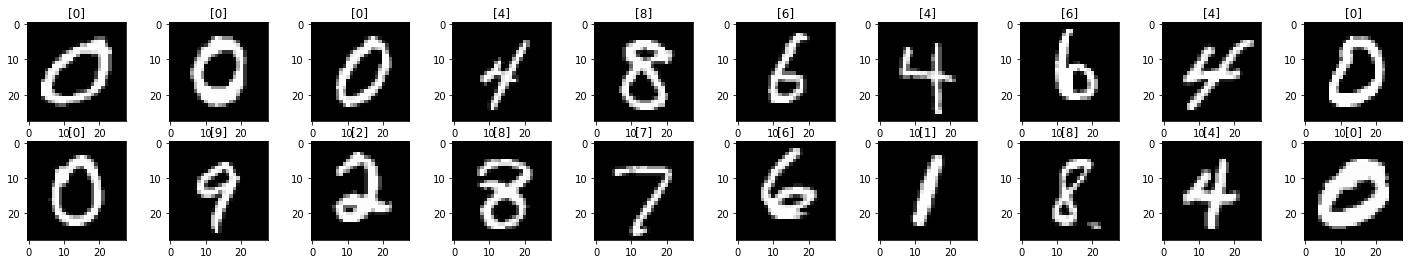

In [18]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1)
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [20]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [22]:
epochs = 15
running_loss_history = []
running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    
  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    print("training loss: {:.4f}, acc: {:.4f}".format(epoch_loss, epoch_acc.item()))

training loss: 0.9729, acc: 76.4750
training loss: 0.3867, acc: 89.1517
training loss: 0.3275, acc: 90.5600
training loss: 0.2978, acc: 91.4617
training loss: 0.2736, acc: 92.1167
training loss: 0.2536, acc: 92.7333
training loss: 0.2348, acc: 93.2350
training loss: 0.2191, acc: 93.7067
training loss: 0.2041, acc: 94.1200
training loss: 0.1908, acc: 94.5283
training loss: 0.1781, acc: 94.9167
training loss: 0.1672, acc: 95.2100
training loss: 0.1574, acc: 95.4950
training loss: 0.1487, acc: 95.7217
training loss: 0.1405, acc: 95.9067


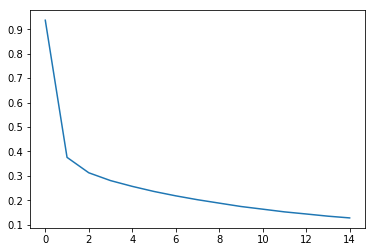

In [10]:
plt.plot(running_loss_history, label="training loss")

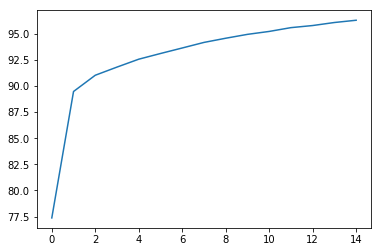

In [11]:
plt.plot(running_corrects_history, label="training accuracy")


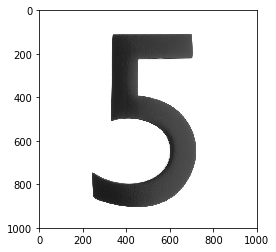

In [32]:
import requests
import PIL.ImageOps
from PIL import Image 

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)

img = Image.open(response.raw)
plt.imshow(img)

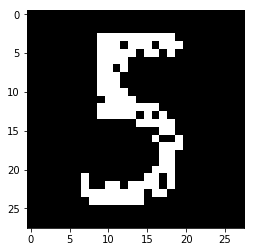

In [33]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [35]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5
